In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from LittleMachine_TDS_Lib import tds_sensitivity, step_average, TDS, generate_dataframe, write_file

In [2]:
filename_before_cird = 'dec20_17.d02'
filename_after_cird  = 'dec20_17.d03'
filename_sensitivity = 'dec20_17.d04'
filename_background  = 'oct31_17.d01'

high_p   = 3.08 * 10 ** (-9)
middle_p = 1.87 * 10 ** (-9)
low_p    = 9.20 * 10 ** (-10)
percent_npts = 0.5

dwell_time = 0.2
start_temp = 95
npts = 10        # number of datapoints used to level the TDS spectrum
total_npts = 840
background_sensitivity = 1.4754 * 10 ** 14

### Initiate TDS class

In [3]:
tds_before_cird = TDS(filename_before_cird)
tds_after_cird = TDS(filename_after_cird)
background = TDS(filename_background)
sensitivity = TDS(filename_sensitivity)

### Load all the files, and plot the raw data.

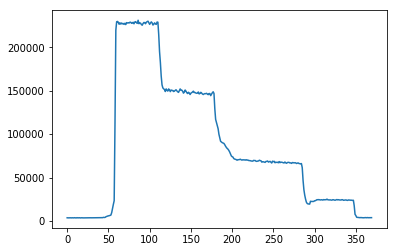

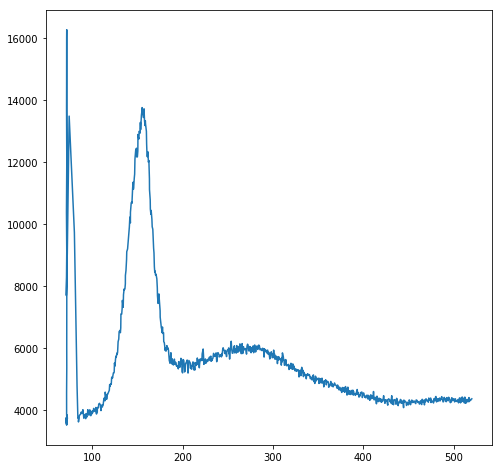

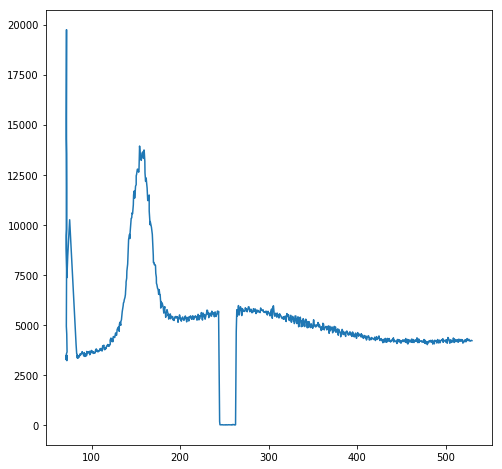

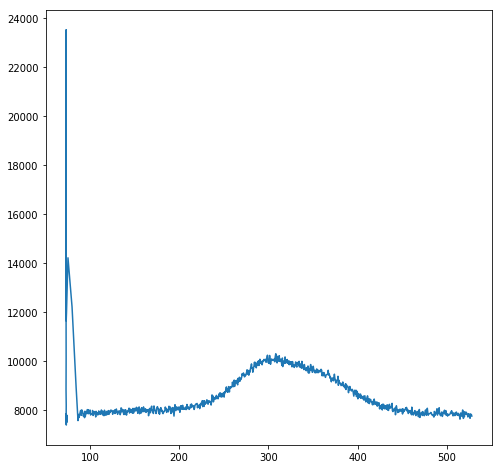

In [4]:
sensitivity.load_data(dwell_time=dwell_time, show_plot=False, sensitivity_plot=True)
tds_before_cird.load_data(dwell_time=dwell_time, show_plot=True)
tds_after_cird.load_data(dwell_time=dwell_time, show_plot=True)
background.load_data(dwell_time=dwell_time, show_plot=True)

### Choose the startpoint, level the baseline, and plot the leveled TDS data.

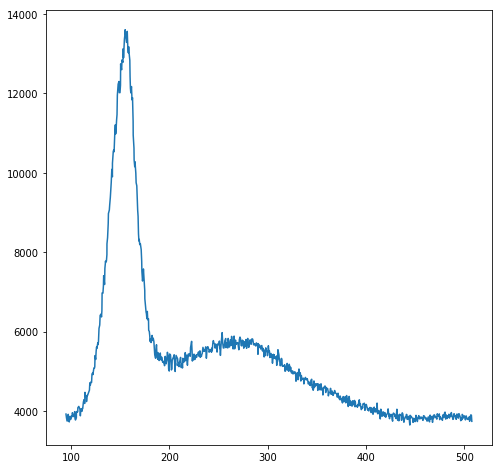

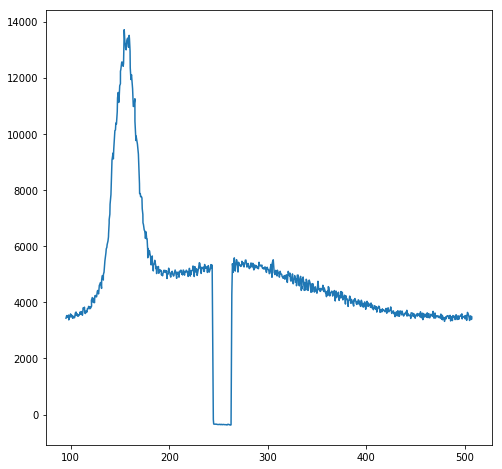

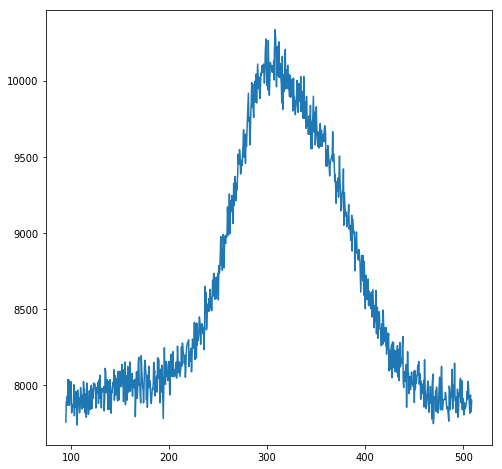

In [5]:
tds_before_cird.level_background(temp_fluc_plot=False, leveled_plot=True, dwell_time=dwell_time, npts=npts,
                                 start_temp=start_temp, total_npts=total_npts)
tds_after_cird.level_background(temp_fluc_plot=False, leveled_plot=True, dwell_time=dwell_time, npts=npts,
                                 start_temp=start_temp, total_npts=total_npts)
background.level_background(temp_fluc_plot=False, leveled_plot=True, dwell_time=dwell_time, npts=npts,
                                 start_temp=start_temp, total_npts=total_npts)

### Calculate the sensitivity factor, and the plot shows if the delimiter is correct.

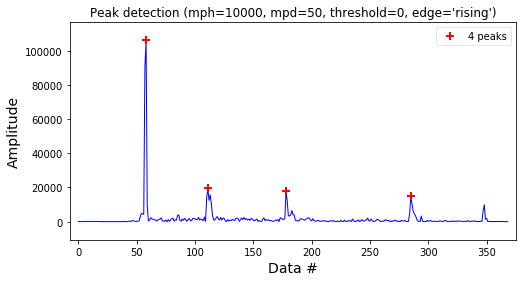

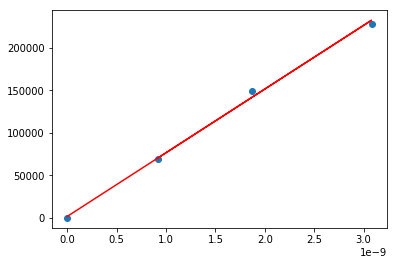

7.48298777169e+13


In [6]:
average_counts = step_average(sensitivity.data, percent_npts, show_plot=True)
current_sensitivity = tds_sensitivity(average_counts, high_p, middle_p, low_p, show_plot=True)
print(current_sensitivity)

### Shift the spectra baseline to the x-axis, and then do background subtraction. 
##### Note that the order of these two steps does not matter.

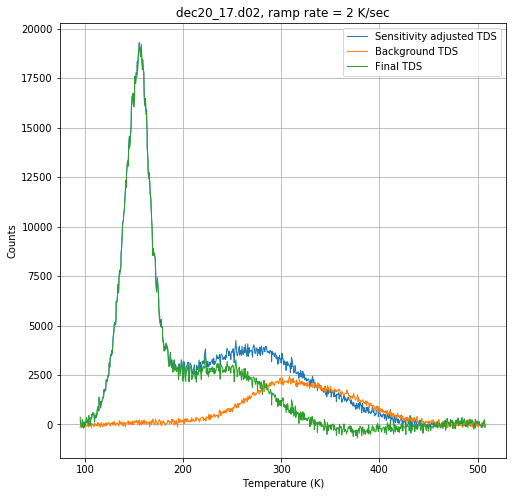

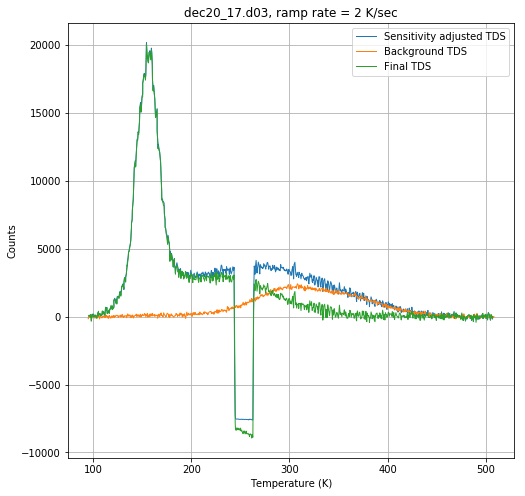

In [7]:
tds_before_cird.shift_x_axis(npts)
tds_after_cird.shift_x_axis(npts)
background.shift_x_axis(npts)
tds_before_cird.background_subtraction(background, sensitivity=current_sensitivity/background_sensitivity, show_plot=True)
tds_after_cird.background_subtraction(background, sensitivity=current_sensitivity/background_sensitivity, show_plot=True)

### Generate a dataframe that contains all the raw and processed data.
##### This dataframe can be used for generating plots, etc if needed.

In [8]:
data_processed = generate_dataframe(tds_before_cird, tds_after_cird, background)
data_processed.head()

,counts_background_subtracted_after,counts_background_subtracted_before,counts_difference,counts_leveled_after,counts_leveled_background,counts_leveled_before,counts_raw_after,counts_raw_background,counts_raw_before,counts_sensitivity_corrected_after,counts_sensitivity_corrected_before,temperature_after,temperature_average,temperature_background,temperature_before,time_elapsed
0,59.015362,369.131515,310.116152,-51.003928,-159.578397,106.281918,3570.0,7750.0,4020.0,-100.563034,209.553118,95.191,95.1030,94.952,95.015,0.0
1,109.250698,45.823445,-63.427252,42.962600,-24.542527,10.793334,3665.0,7885.0,3925.0,84.708171,21.280919,95.896,95.7055,95.398,95.515,0.2
2,3.671736,-108.181058,-111.852794,-13.097258,-29.495236,-69.827167,3610.0,7880.0,3845.0,-25.823500,-137.676294,96.619,96.3845,95.986,96.150,0.4
3,-38.136853,-129.706287,-91.569434,-13.997331,10.538704,-60.439851,3610.0,7920.0,3855.0,-27.598150,-119.167583,97.233,97.0050,96.408,96.777,0.6
4,168.324206,244.800806,76.476599,60.297563,-49.437169,99.085245,3685.0,7860.0,4015.0,118.887038,195.363637,97.714,97.4885,96.708,97.263,0.8


### Output the data (not all of them shown above) to a file, starting with a letter "p".
##### The tds_after_cird argument is solely for the purpose of naming and pathing. The output file starts with "p" and have the same file name as tds_after_cird.filename.

In [9]:
write_file(data_processed, tds_after_cird)

Save the data to pdec20_17.d03? (Y/N): n


### Create plot with processed data. The following is just an example.

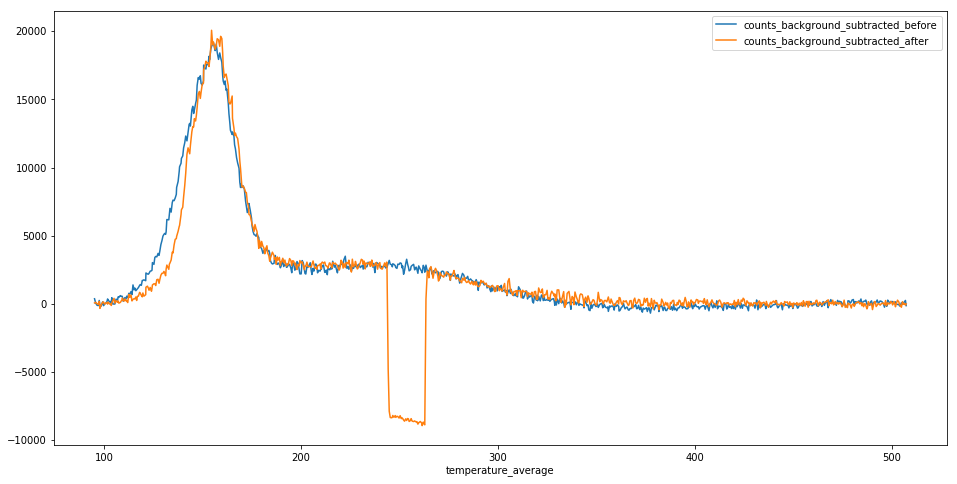

In [10]:
x = "temperature_average"
y1 = "counts_background_subtracted_before"
y2 = "counts_background_subtracted_after"
data_processed.set_index(x)[[y1, y2]].plot(figsize=(16,8))